Автор материала: Зраев Артем.

Можно использовать в каких угодно целях.

<b> В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория</b>

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

- customerID           object
- gender               object
- SeniorCitizen         int64
- Partner              object
- Dependents           object
- tenure                int64
- PhoneService         object
- MultipleLines        object
- InternetService      object
- OnlineSecurity       object
- OnlineBackup         object
- DeviceProtection     object
- TechSupport          object
- StreamingTV          object
- StreamingMovies      object
- Contract             object
- PaperlessBilling     object
- PaymentMethod        object
- MonthlyCharges      float64
- TotalCharges         object
- Churn                object

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [2]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

##### 1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [3]:
df['gender']

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object

In [4]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

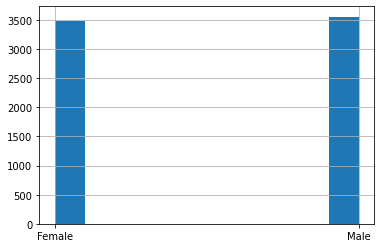

In [5]:
df['gender'].hist()

##### 2. Какое количество уникальных значений у поля InternetService?

In [6]:
df['InternetService']

0               DSL
1               DSL
2               DSL
3               DSL
4       Fiber optic
           ...     
7038            DSL
7039    Fiber optic
7040            DSL
7041    Fiber optic
7042    Fiber optic
Name: InternetService, Length: 7043, dtype: object

##### 3. Выведите статистики по полю TotalCharges (median, mean, std).

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [9]:
df['TotalCharges'].tolist()

['29.85',
 '1889.5',
 '108.15',
 '1840.75',
 '151.65',
 '820.5',
 '1949.4',
 '301.9',
 '3046.05',
 '3487.95',
 '587.45',
 '326.8',
 '5681.1',
 '5036.3',
 '2686.05',
 '7895.15',
 '1022.95',
 '7382.25',
 '528.35',
 '1862.9',
 '39.65',
 '202.25',
 '20.15',
 '3505.1',
 '2970.3',
 '1530.6',
 '4749.15',
 '30.2',
 '6369.45',
 '1093.1',
 '6766.95',
 '181.65',
 '1874.45',
 '20.2',
 '45.25',
 '7251.7',
 '316.9',
 '3548.3',
 '3549.25',
 '1105.4',
 '475.7',
 '4872.35',
 '418.25',
 '4861.45',
 '981.45',
 '3906.7',
 '97',
 '144.15',
 '4217.8',
 '4254.1',
 '3838.75',
 '1426.4',
 '1752.65',
 '633.3',
 '4456.35',
 '1752.55',
 '6311.2',
 '7076.35',
 '894.3',
 '7853.7',
 '4707.1',
 '5450.7',
 '2962',
 '957.1',
 '857.25',
 '244.1',
 '3650.35',
 '2497.2',
 '930.9',
 '887.35',
 '49.05',
 '1090.65',
 '7099',
 '1424.6',
 '177.4',
 '6139.5',
 '2688.85',
 '482.25',
 '2111.3',
 '1216.6',
 '79.35',
 '565.35',
 '496.9',
 '4327.5',
 '973.35',
 '918.75',
 '2215.45',
 '1057',
 '927.1',
 '1009.25',
 '2570.2',
 '74.7',

In [10]:
df['TotalCharges'] = df['TotalCharges'].replace(to_replace=[' '], value= '0').astype(float)
df['TotalCharges']

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [11]:
df['TotalCharges'].tolist()

[29.85,
 1889.5,
 108.15,
 1840.75,
 151.65,
 820.5,
 1949.4,
 301.9,
 3046.05,
 3487.95,
 587.45,
 326.8,
 5681.1,
 5036.3,
 2686.05,
 7895.15,
 1022.95,
 7382.25,
 528.35,
 1862.9,
 39.65,
 202.25,
 20.15,
 3505.1,
 2970.3,
 1530.6,
 4749.15,
 30.2,
 6369.45,
 1093.1,
 6766.95,
 181.65,
 1874.45,
 20.2,
 45.25,
 7251.7,
 316.9,
 3548.3,
 3549.25,
 1105.4,
 475.7,
 4872.35,
 418.25,
 4861.45,
 981.45,
 3906.7,
 97.0,
 144.15,
 4217.8,
 4254.1,
 3838.75,
 1426.4,
 1752.65,
 633.3,
 4456.35,
 1752.55,
 6311.2,
 7076.35,
 894.3,
 7853.7,
 4707.1,
 5450.7,
 2962.0,
 957.1,
 857.25,
 244.1,
 3650.35,
 2497.2,
 930.9,
 887.35,
 49.05,
 1090.65,
 7099.0,
 1424.6,
 177.4,
 6139.5,
 2688.85,
 482.25,
 2111.3,
 1216.6,
 79.35,
 565.35,
 496.9,
 4327.5,
 973.35,
 918.75,
 2215.45,
 1057.0,
 927.1,
 1009.25,
 2570.2,
 74.7,
 5714.25,
 7107.0,
 7459.05,
 927.35,
 4748.7,
 113.85,
 1107.2,
 2514.5,
 20.2,
 19.45,
 3605.6,
 3027.25,
 7611.85,
 100.2,
 7303.05,
 927.65,
 3921.3,
 1363.25,
 5238.9,
 3

In [12]:
df.TotalCharges.describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

##### 4. Сделайте замену значений поля PhoneService  на числовые (Yes->1, No->0)

In [13]:
df['PhoneService']

0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040     No
7041    Yes
7042    Yes
Name: PhoneService, Length: 7043, dtype: object

In [14]:
df['PhoneService'] = df['PhoneService'].replace(to_replace=['No', 'Yes'], value=[0,1])
df['PhoneService'] 

0       0
1       1
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    0
7041    1
7042    1
Name: PhoneService, Length: 7043, dtype: int64

##### 5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

### Поздно прочитал задание) Заменил в 3-м задании.

##### 6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [15]:
df['Churn'] = df['Churn'].replace(to_replace=['No', 'Yes'], value=[0,1])
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

##### 7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport  на числовые (Yes -> 1, No -> 0, No internet service->0)

In [16]:
df[['StreamingMovies', 'StreamingTV', 'TechSupport']] = df[['StreamingMovies', 'StreamingTV', 'TechSupport']].replace(to_replace=['No', 'Yes','No internet service'], value=[0,1,0])
df[['StreamingMovies', 'StreamingTV', 'TechSupport']]

,StreamingMovies,StreamingTV,TechSupport
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,1
4,0,0,0
...,...,...,...
7038,1,1,1
7039,1,1,0
7040,0,0,0
7041,0,0,0


##### 8. Заполните пропуски в поле PhoneService значением 0

In [17]:
df['PhoneService']

0       0
1       1
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    0
7041    1
7042    1
Name: PhoneService, Length: 7043, dtype: int64

In [18]:
df['PhoneService'] = df['PhoneService'].replace(np.nan).fillna(0)
df['PhoneService']

0       0
1       1
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    0
7041    1
7042    1
Name: PhoneService, Length: 7043, dtype: int64

#### 8. Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [19]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']

df = df[['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']]
df.head(3)


,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.85,0,0,0,0
1,Male,34,1,1889.50,0,0,0,0
2,Male,2,1,108.15,0,0,0,1


In [20]:
df.dtypes

gender              object
tenure               int64
PhoneService         int64
TotalCharges       float64
StreamingMovies      int64
StreamingTV          int64
TechSupport          int64
Churn                int64
dtype: object

##### 9. Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection. Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [21]:
from sklearn.model_selection import train_test_split

features = df[['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']]
target = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.40, random_state=42)


##### 10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([
                ('selector', ColumnSelector(key='gender')),
                ('ohe', OHEEncoder(key='gender'))
            ])

##### 11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [23]:
gender.fit_transform(X_train, y_train)


,gender_Female,gender_Male
999,0,1
389,0,1
2330,0,1
1476,0,1
2240,1,0
...,...,...
3772,0,1
5191,1,0
5226,0,1
5390,0,1


##### 12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

In [24]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

##### 13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [25]:
TotalCharges =  Pipeline([
                ('selector', NumberSelector(key='TotalCharges')),
                ('standard', StandardScaler())
            ])

Объединение всех "кубиков" очень легко сделать таким образом

In [26]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [27]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
          

##### 14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [61]:
pred = pipeline.predict(X_test)
pred

array([1, 0, 0, ..., 0, 1, 0])

##### 15. Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [62]:
from sklearn import model_selection
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, pred)
conf_mat = pd.DataFrame(conf_mat, index= pipeline.classes_)
conf_mat

,0,1
0,1792,277
1,378,371


In [68]:
preds = pipeline.predict_proba(X_test)
preds

array([[0.346, 0.654],
       [0.99 , 0.01 ],
       [0.85 , 0.15 ],
       ...,
       [0.85 , 0.15 ],
       [0.28 , 0.72 ],
       [1.   , 0.   ]])

In [69]:
pred_proba = pipeline.predict_proba(X_test)
pred_proba

array([[0.346, 0.654],
       [0.99 , 0.01 ],
       [0.85 , 0.15 ],
       ...,
       [0.85 , 0.15 ],
       [0.28 , 0.72 ],
       [1.   , 0.   ]])

In [71]:
from sklearn.metrics import roc_auc_score, log_loss

pred_auc = roc_auc_score(y_test, preds[:,1])
pred_auc

0.7910002123017575

In [75]:
from sklearn import metrics
preds = pred_proba[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'lowel right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


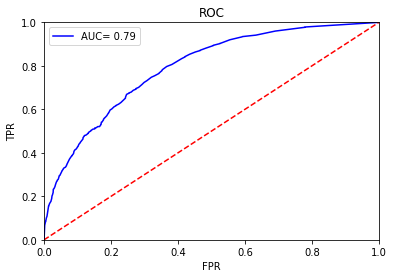

In [76]:
import matplotlib.pyplot as plt
plt.title('ROC')
plt.plot(fpr, tpr, 'b',label='AUC= %0.2f' % roc_auc)
plt.legend(loc = 'lowel right')
plt.plot([0,10],[0,10],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.show()

In [77]:
pred_log = log_loss(y_test, preds)
pred_log

0.7237251022023986

### Сохраним наш пайплайн

In [78]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)